<h1 style="background-color:#20b2aa; color:white; padding:10px; border-radius:10px;">
US YouTube Analysis (2020–2024)
</h1>



### This dataset is a daily record of the top trending YouTube videos
- YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes)
- There is a JSON file where categories for a specific video will be extracted from
- Dataset (https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset)
  

## context 
- Libaries importation
- Exploratory Analysis
- Data cleaning
- Feature engineering
- Extraction of data from Json file
  ## Data Analysis
- Top performing categories with (views,likes ,dislikes,comment )
- Top performing channel with (views,likes ,dislikes,comment )
- Top performing categories with (views rate,likesrate ,dislikesrate,commentrate)
- Top performing channel with (views rate,likes rate ,dislikes rate,comment rate )
- Time taken for videos to reach  trendy list
- Trend Duration by Channels and Categories
- videos trends in relation to channel and categories
- Yearly performance overview


In [88]:
# start by Importing  libaries that will be use for this Analysis
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
sns.set_palette(["#a8dadc"])

In [89]:
# imoport and view the top 5 dataset 
df_youtube = pd.read_csv("US_youtube_trending_data.csv")
df_youtube.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


## Exploratory Analysis


In [90]:
# quick overview of your datasetotal number of rows
# Column names and data types if they are in good format
#How many values are missing in each column

df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268787 non-null  object
 1   title              268787 non-null  object
 2   publishedAt        268787 non-null  object
 3   channelId          268787 non-null  object
 4   channelTitle       268787 non-null  object
 5   categoryId         268787 non-null  int64 
 6   trending_date      268787 non-null  object
 7   tags               268787 non-null  object
 8   view_count         268787 non-null  int64 
 9   likes              268787 non-null  int64 
 10  dislikes           268787 non-null  int64 
 11  comment_count      268787 non-null  int64 
 12  thumbnail_link     268787 non-null  object
 13  comments_disabled  268787 non-null  bool  
 14  ratings_disabled   268787 non-null  bool  
 15  description        264238 non-null  object
dtypes: bool(2), int64(5)

In [91]:
# check if there missing or duplicates values that requires cleaning

print("Number of Rows :",df_youtube.shape[0])
print("Number of columns :",df_youtube.shape[1])
print("Number of duplicates :",df_youtube.duplicated().sum())
print("missing values :",df_youtube.isna().sum().values.sum())
print("columns:",df_youtube.columns.to_list())
print()
print("Unique variables:",df_youtube.nunique())


Number of Rows : 268787
Number of columns : 16
Number of duplicates : 83
missing values : 4549
columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique variables: video_id              47142
title                 48471
publishedAt           46554
channelId              8302
channelTitle           8543
categoryId               15
trending_date          1323
tags                  32909
view_count           255236
likes                136839
dislikes              13179
comment_count         35557
thumbnail_link        47142
comments_disabled         2
ratings_disabled          2
description           48448
dtype: int64


In [92]:
# check the columns with missing values
df_youtube.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4549
dtype: int64

### This is the stage to explore and understand your data before doing deeper analysis or modeling
- There are 268787 rows and 16 columns
- There are 83 duplicate rows
- There are 4549 missing values in description,these are videos with no descriptions
- There are 15 different movie categories
- Comments_disabled and ratings_disabled are only the categorical columns in this data set
- Video id has 47142 unique values , meaning some videos are repeated on trend


# Data cleaning 
- Filling the rows with missing values
- Drop all duplicates
- converting dates from object dtype to datatime dtype

In [93]:
# replacing all the missing values in description columns with no description
df_youtube['description'] = df_youtube['description'].fillna('No description')
df_youtube[df_youtube['description'] == 'No description'].head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
223,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62939,168,7304,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,No description
249,NYXABBpPJss,When you get on the grill for your friends Bir...,2020-08-12T04:36:57Z,UCI8hY4ummWDZgFSjxU_HFNQ,Jeremiah Phillips,23,2020-08-13T00:00:00Z,[None],193157,9057,148,666,https://i.ytimg.com/vi/NYXABBpPJss/default.jpg,False,False,No description
446,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-14T00:00:00Z,Lock|picking,511773,69610,214,7837,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,No description
475,NYXABBpPJss,When you get on the grill for your friends Bir...,2020-08-12T04:36:57Z,UCI8hY4ummWDZgFSjxU_HFNQ,Jeremiah Phillips,23,2020-08-14T00:00:00Z,[None],219696,9829,158,700,https://i.ytimg.com/vi/NYXABBpPJss/default.jpg,False,False,No description
669,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-15T00:00:00Z,Lock|picking,651306,85757,251,9186,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,No description


In [94]:
# dropping all duplicates 
df_youtube.drop_duplicates(inplace=True)
df_youtube.duplicated().sum()

0

In [95]:
#conerting from object dtype to datatime dtype
df_youtube['publishedAt'] = pd.to_datetime(df_youtube['publishedAt'])
df_youtube['trending_date'] = pd.to_datetime(df_youtube['trending_date'])                                          

In [96]:
# displaying category id  of categories name that will be retrieve from Json  file provided
df_youtube['categoryId'].unique()

array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29],
      dtype=int64)

In [97]:
#Import json  file to extract the actual categories names
categories = pd.read_json('US_category_id.json')
categories.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."


In [98]:
# view the full details of items column  in the  dictionary
categories['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc',
 'id': '1',
 'snippet': {'title': 'Film & Animation',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}

In [99]:
# creating a dictionary for categories Id and title
# we will be needing the category id also remember thats what is provided in df_youtube file
categories_dict = {}
for i in categories['items']:
    categories_dict[i['id']] = i['snippet']['title']
categories_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [100]:
# get each categories names from categories dictionary created earlier
def extract(category_id):
    return categories_dict.get(str(category_id), 'Title')

In [101]:
#create a new column and insert it into df_youtube dataset
df_youtube.insert(6,'Category_names',df_youtube['categoryId'].apply(extract))


In [102]:
print((df_youtube['video_id'].value_counts() == 1).sum(),'videos enter into trend just once')
print((df_youtube['video_id'].value_counts() > 1).sum(),'Videos enter into trend more than once')


545 videos enter into trend just once
46597 Videos enter into trend more than once


- 545 videos enter into trend just once
- 46597 Videos enter into trend more than once


In [103]:
# overall views after trend this is what will be use for analysis
df_max_views= df_youtube.sort_values('view_count',ascending=False).drop_duplicates(['video_id'])


In [104]:
# initial views when joined 
df_min_views = df_youtube.sort_values('view_count',ascending=True).drop_duplicates(['video_id'])


In [105]:
# checking the dataype of columns,two data columns are in object format
df_max_views.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47142 entries, 266187 to 15289
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           47142 non-null  object             
 1   title              47142 non-null  object             
 2   publishedAt        47142 non-null  datetime64[ns, UTC]
 3   channelId          47142 non-null  object             
 4   channelTitle       47142 non-null  object             
 5   categoryId         47142 non-null  int64              
 6   Category_names     47142 non-null  object             
 7   trending_date      47142 non-null  datetime64[ns, UTC]
 8   tags               47142 non-null  object             
 9   view_count         47142 non-null  int64              
 10  likes              47142 non-null  int64              
 11  dislikes           47142 non-null  int64              
 12  comment_count      47142 non-null  int64      

In [106]:
# Counts how many videos fall under each Category_names
df_max_views['Category_names'].value_counts().sort_values(ascending=False).reset_index()

,Category_names,count
0,Gaming,9434
1,Entertainment,9186
2,Music,7351
3,Sports,6073
4,People & Blogs,4034
5,Comedy,2254
6,Film & Animation,1837
7,News & Politics,1732
8,Science & Technology,1424
9,Howto & Style,1217


- Gaming is the most comon category folowed by Entertainment and music
- Non profits & Activism is the less common

## Category Analysis

In [107]:
#over all view counts for each categories
df_category_analysis = df_max_views.groupby('Category_names')['view_count'].sum().reset_index()

#over all like  counts for each categories
df_Likes = df_max_views.groupby('Category_names')['likes'].sum().reset_index()

#over all dislike counts for each categories
df_dislikes = df_max_views.groupby('Category_names')['dislikes'].sum().reset_index()

#over all comment counts for each categories
df_comment_count = df_max_views.groupby('Category_names')['comment_count'].sum().reset_index()

# Add all in df_category_analysis 
df_category_analysis['likes'] = df_Likes['likes']
df_category_analysis['dislikes'] = df_dislikes['dislikes']
df_category_analysis['comment_count'] = df_comment_count['comment_count']
df_category_analysis = df_category_analysis.sort_values(by='view_count',ascending=False).set_index('Category_names')
df_category_analysis

,view_count,likes,dislikes,comment_count
Category_names,,,,
Music,36135478030,1954067478,19621141,185162090
Entertainment,32978966841,1323143229,10745847,77289919
Gaming,16461396290,799269281,7138657,56736098
Sports,10131820707,213957399,2711628,19117661
People & Blogs,7967143589,413848228,5937492,24693042
Film & Animation,5661302348,199290402,1287358,13353079
Science & Technology,4234976127,147644923,1811199,7904018
Comedy,3930707973,266218017,2198626,13007253
News & Politics,2501592281,33674960,1721492,8358178


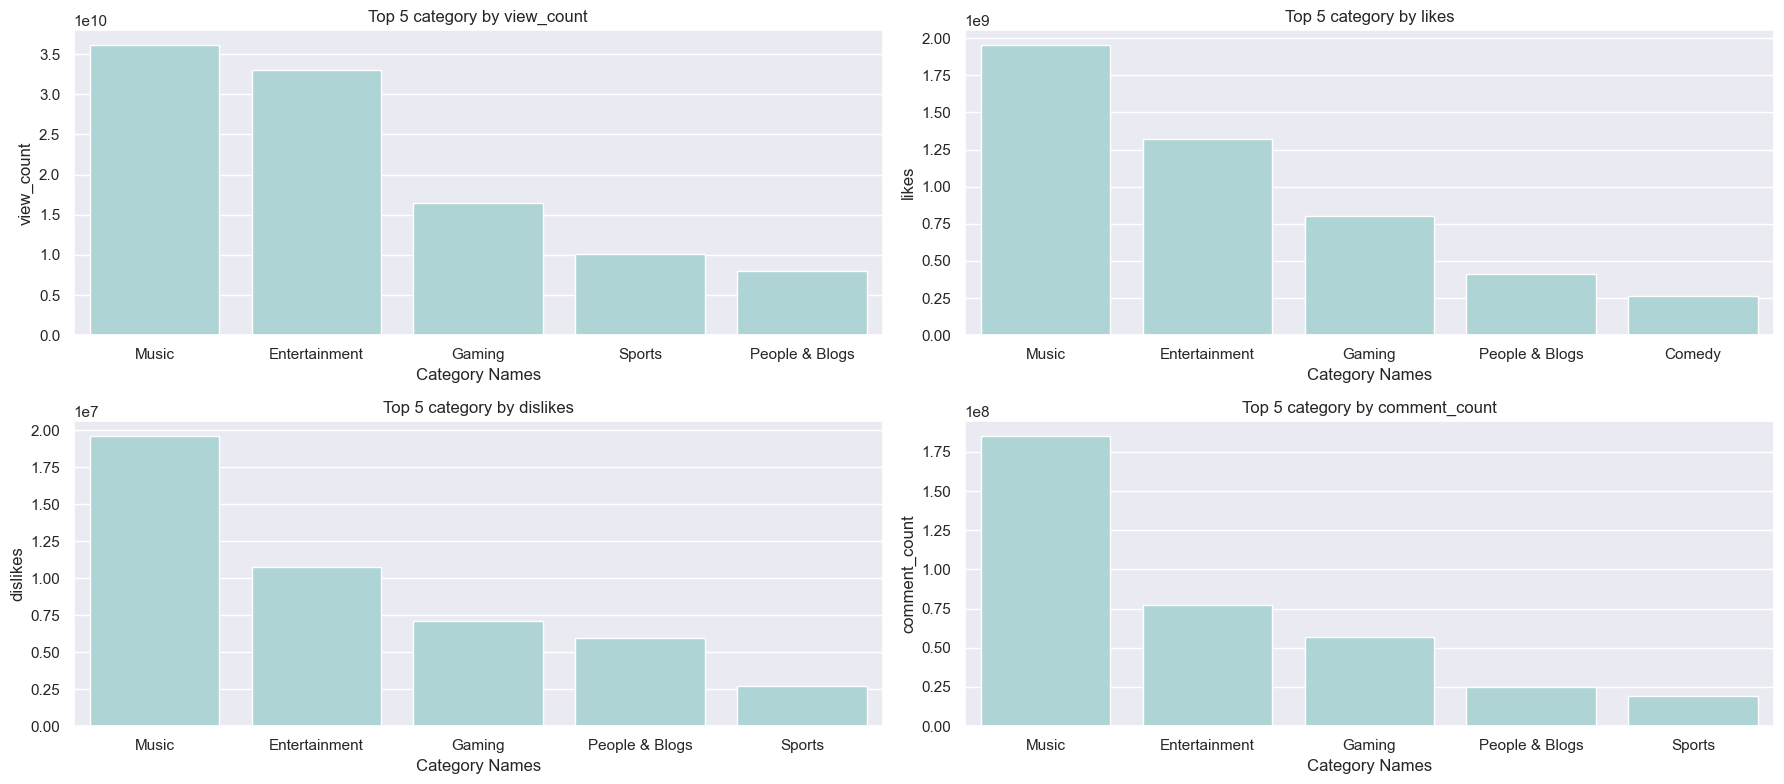

In [108]:
# categories with the highest watch in term of view_count,likes,dislikes,comment_count
plt.figure(figsize=(18,8))
colum_list = ['view_count','likes','dislikes','comment_count']

for i, col in enumerate(colum_list, 1):
    plt.subplot(2, 2, i)
    top5 = df_category_analysis[col].nlargest(5) # sorting by higest counts in each column
    sns.barplot(x=top5.index, y=top5.values)
    plt.title(f'Top 5 category by {col}')
    plt.xlabel('Category Names')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- Music has the highest view counts follow by Entertainment and Games in term of( view_count,likes,dislikes,comment_count )

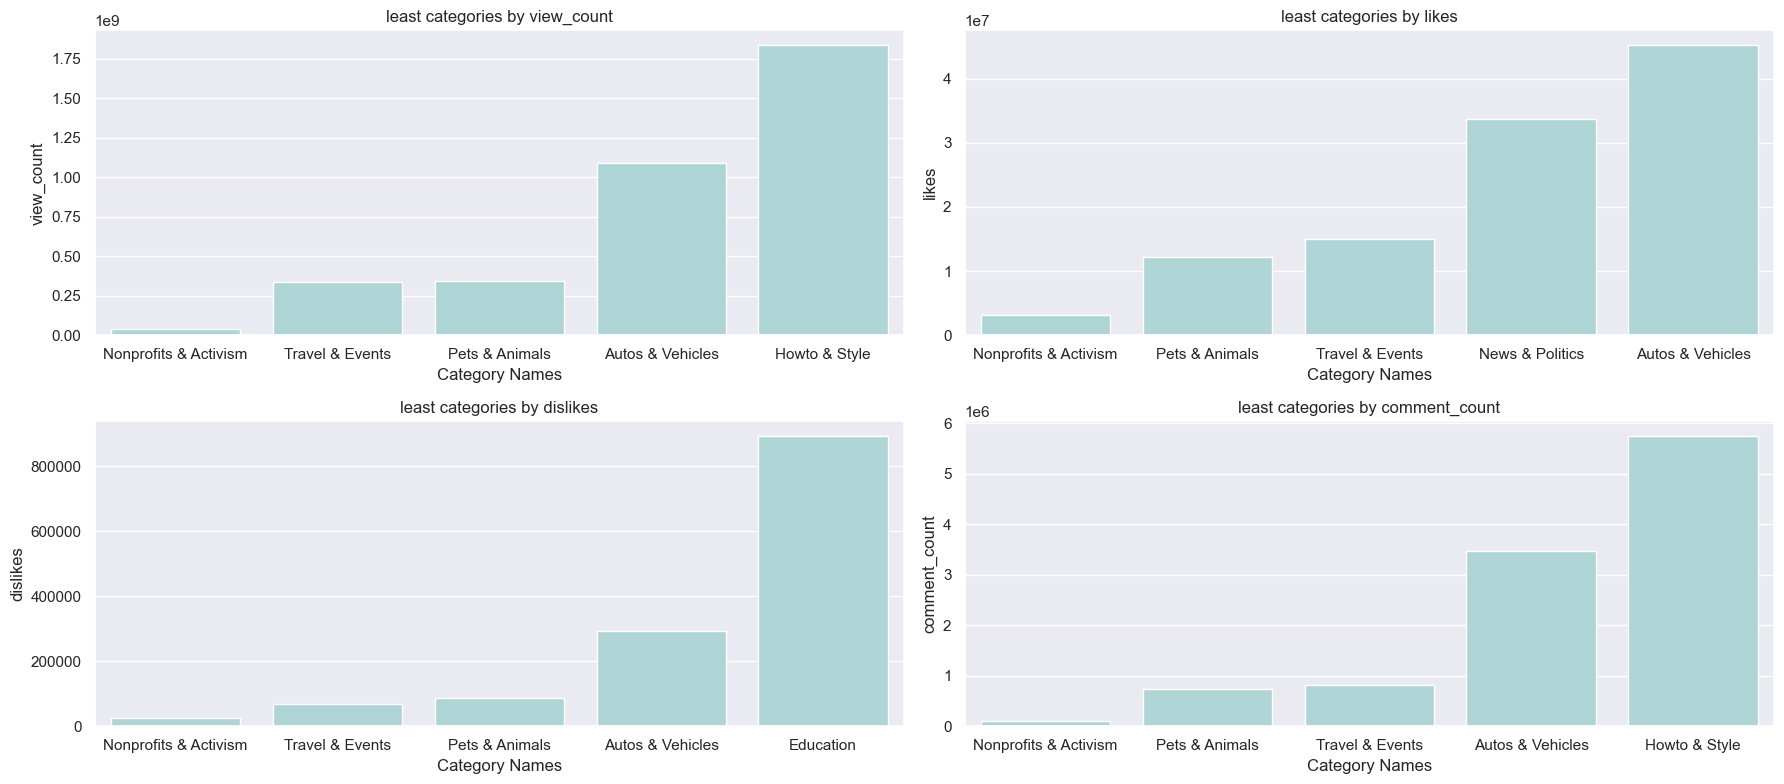

In [109]:
# categories with the least watch
plt.figure(figsize=(18,8))
colum_list = ['view_count','likes','dislikes','comment_count']

for i, col in enumerate(colum_list, 1):
    plt.subplot(2, 2, i)
    top5 = df_category_analysis[col].nsmallest(5) # sorting by lowest counts in each column
    sns.barplot(x=top5.index, y=top5.values)
    plt.title(f'least categories by {col}')
    plt.xlabel('Category Names')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- Nonprofits & activism  has the lowest view counts follow by pets&Animals then Travel & Events in term of 
( view_count,likes,dislikes,comment_count ) respectively



In [110]:
# check unique value for each features
df_max_views.nunique()

video_id             47142
title                46897
publishedAt          46554
channelId             8294
channelTitle          8513
categoryId              15
Category_names          15
trending_date         1323
tags                 32278
view_count           46755
likes                39808
dislikes              5612
comment_count        14887
thumbnail_link       47142
comments_disabled        2
ratings_disabled         2
description          44819
dtype: int64

### Feature engineering for categories

In [111]:
# create new columns 

df_category_analysis['engagement_rate'] = round((df_category_analysis['likes'] + df_category_analysis["dislikes"])/df_category_analysis["view_count"]*100,2)

df_category_analysis['likes%'] = round((df_category_analysis['likes']/df_category_analysis["view_count"])*100,2)

df_category_analysis['dislikes%'] = round((df_category_analysis['dislikes']/df_category_analysis["view_count"])*100,2)

df_category_analysis['comment_count%'] = round((df_category_analysis['comment_count']/df_category_analysis["view_count"])*100,2)

df_category_analysis= df_category_analysis.reset_index()
df_category_analysis

,Category_names,view_count,likes,dislikes,comment_count,engagement_rate,likes%,dislikes%,comment_count%
0,Music,36135478030,1954067478,19621141,185162090,5.46,5.41,0.05,0.51
1,Entertainment,32978966841,1323143229,10745847,77289919,4.04,4.01,0.03,0.23
2,Gaming,16461396290,799269281,7138657,56736098,4.90,4.86,0.04,0.34
3,Sports,10131820707,213957399,2711628,19117661,2.14,2.11,0.03,0.19
4,People & Blogs,7967143589,413848228,5937492,24693042,5.27,5.19,0.07,0.31
5,Film & Animation,5661302348,199290402,1287358,13353079,3.54,3.52,0.02,0.24
6,Science & Technology,4234976127,147644923,1811199,7904018,3.53,3.49,0.04,0.19
7,Comedy,3930707973,266218017,2198626,13007253,6.83,6.77,0.06,0.33
8,News & Politics,2501592281,33674960,1721492,8358178,1.41,1.35,0.07,0.33
9,Education,2202271108,112519257,893733,6319077,5.15,5.11,0.04,0.29


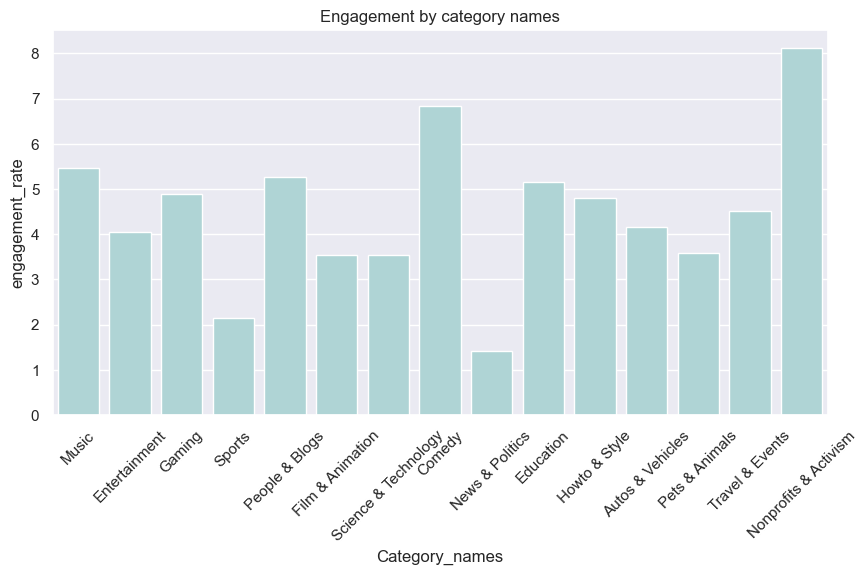

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(x="Category_names",y= 'engagement_rate' ,data = df_category_analysis)
plt.title('Engagement by category names')
plt.xticks(rotation=45)
plt.show()

### The engagement rate shows how well the audience connect with content
- Nonprofits & Activism and Science & Technology has the higest engagement rate which shows that the content in this categories are more relevant
-  News & politics and sports has the lowest engament rate , even though there view counts are high

<Figure size 2000x1000 with 0 Axes>

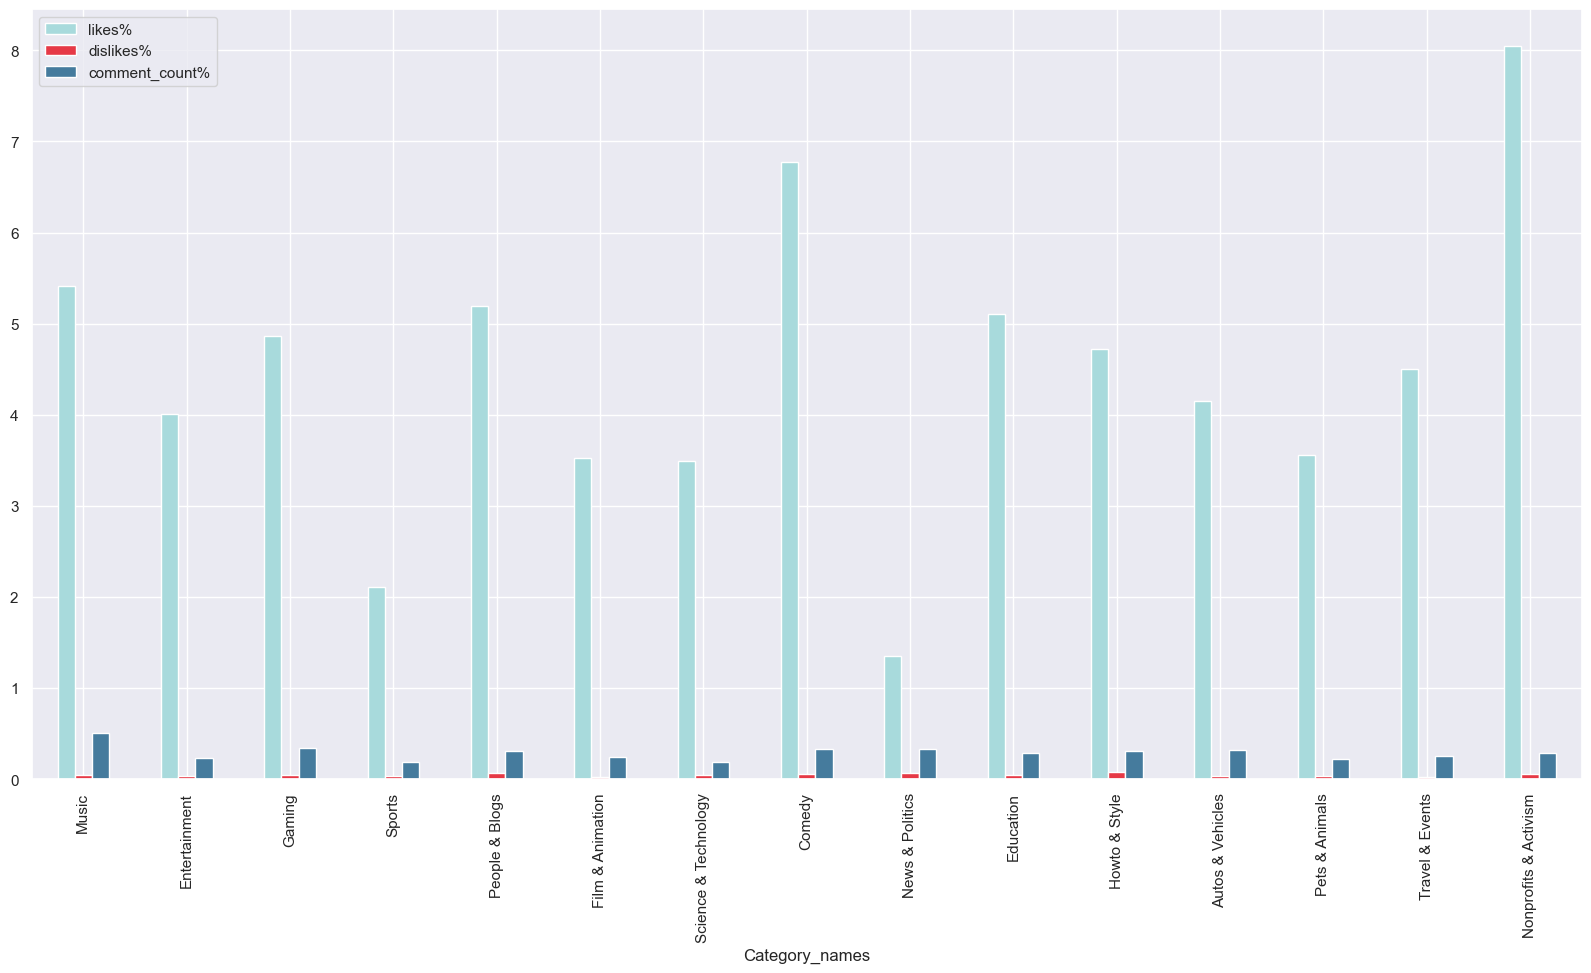

In [113]:
plt.figure(figsize=(20,10))
sns.set_palette([
    "#a8dadc", #sky blue
    "#e63946" ,  # Red
    "#457b9d",  # Steel blue

    
])
df_category_analysis.plot(x='Category_names',y=['likes%','dislikes%','comment_count%'], kind='bar',figsize=(20,10))
plt.show()

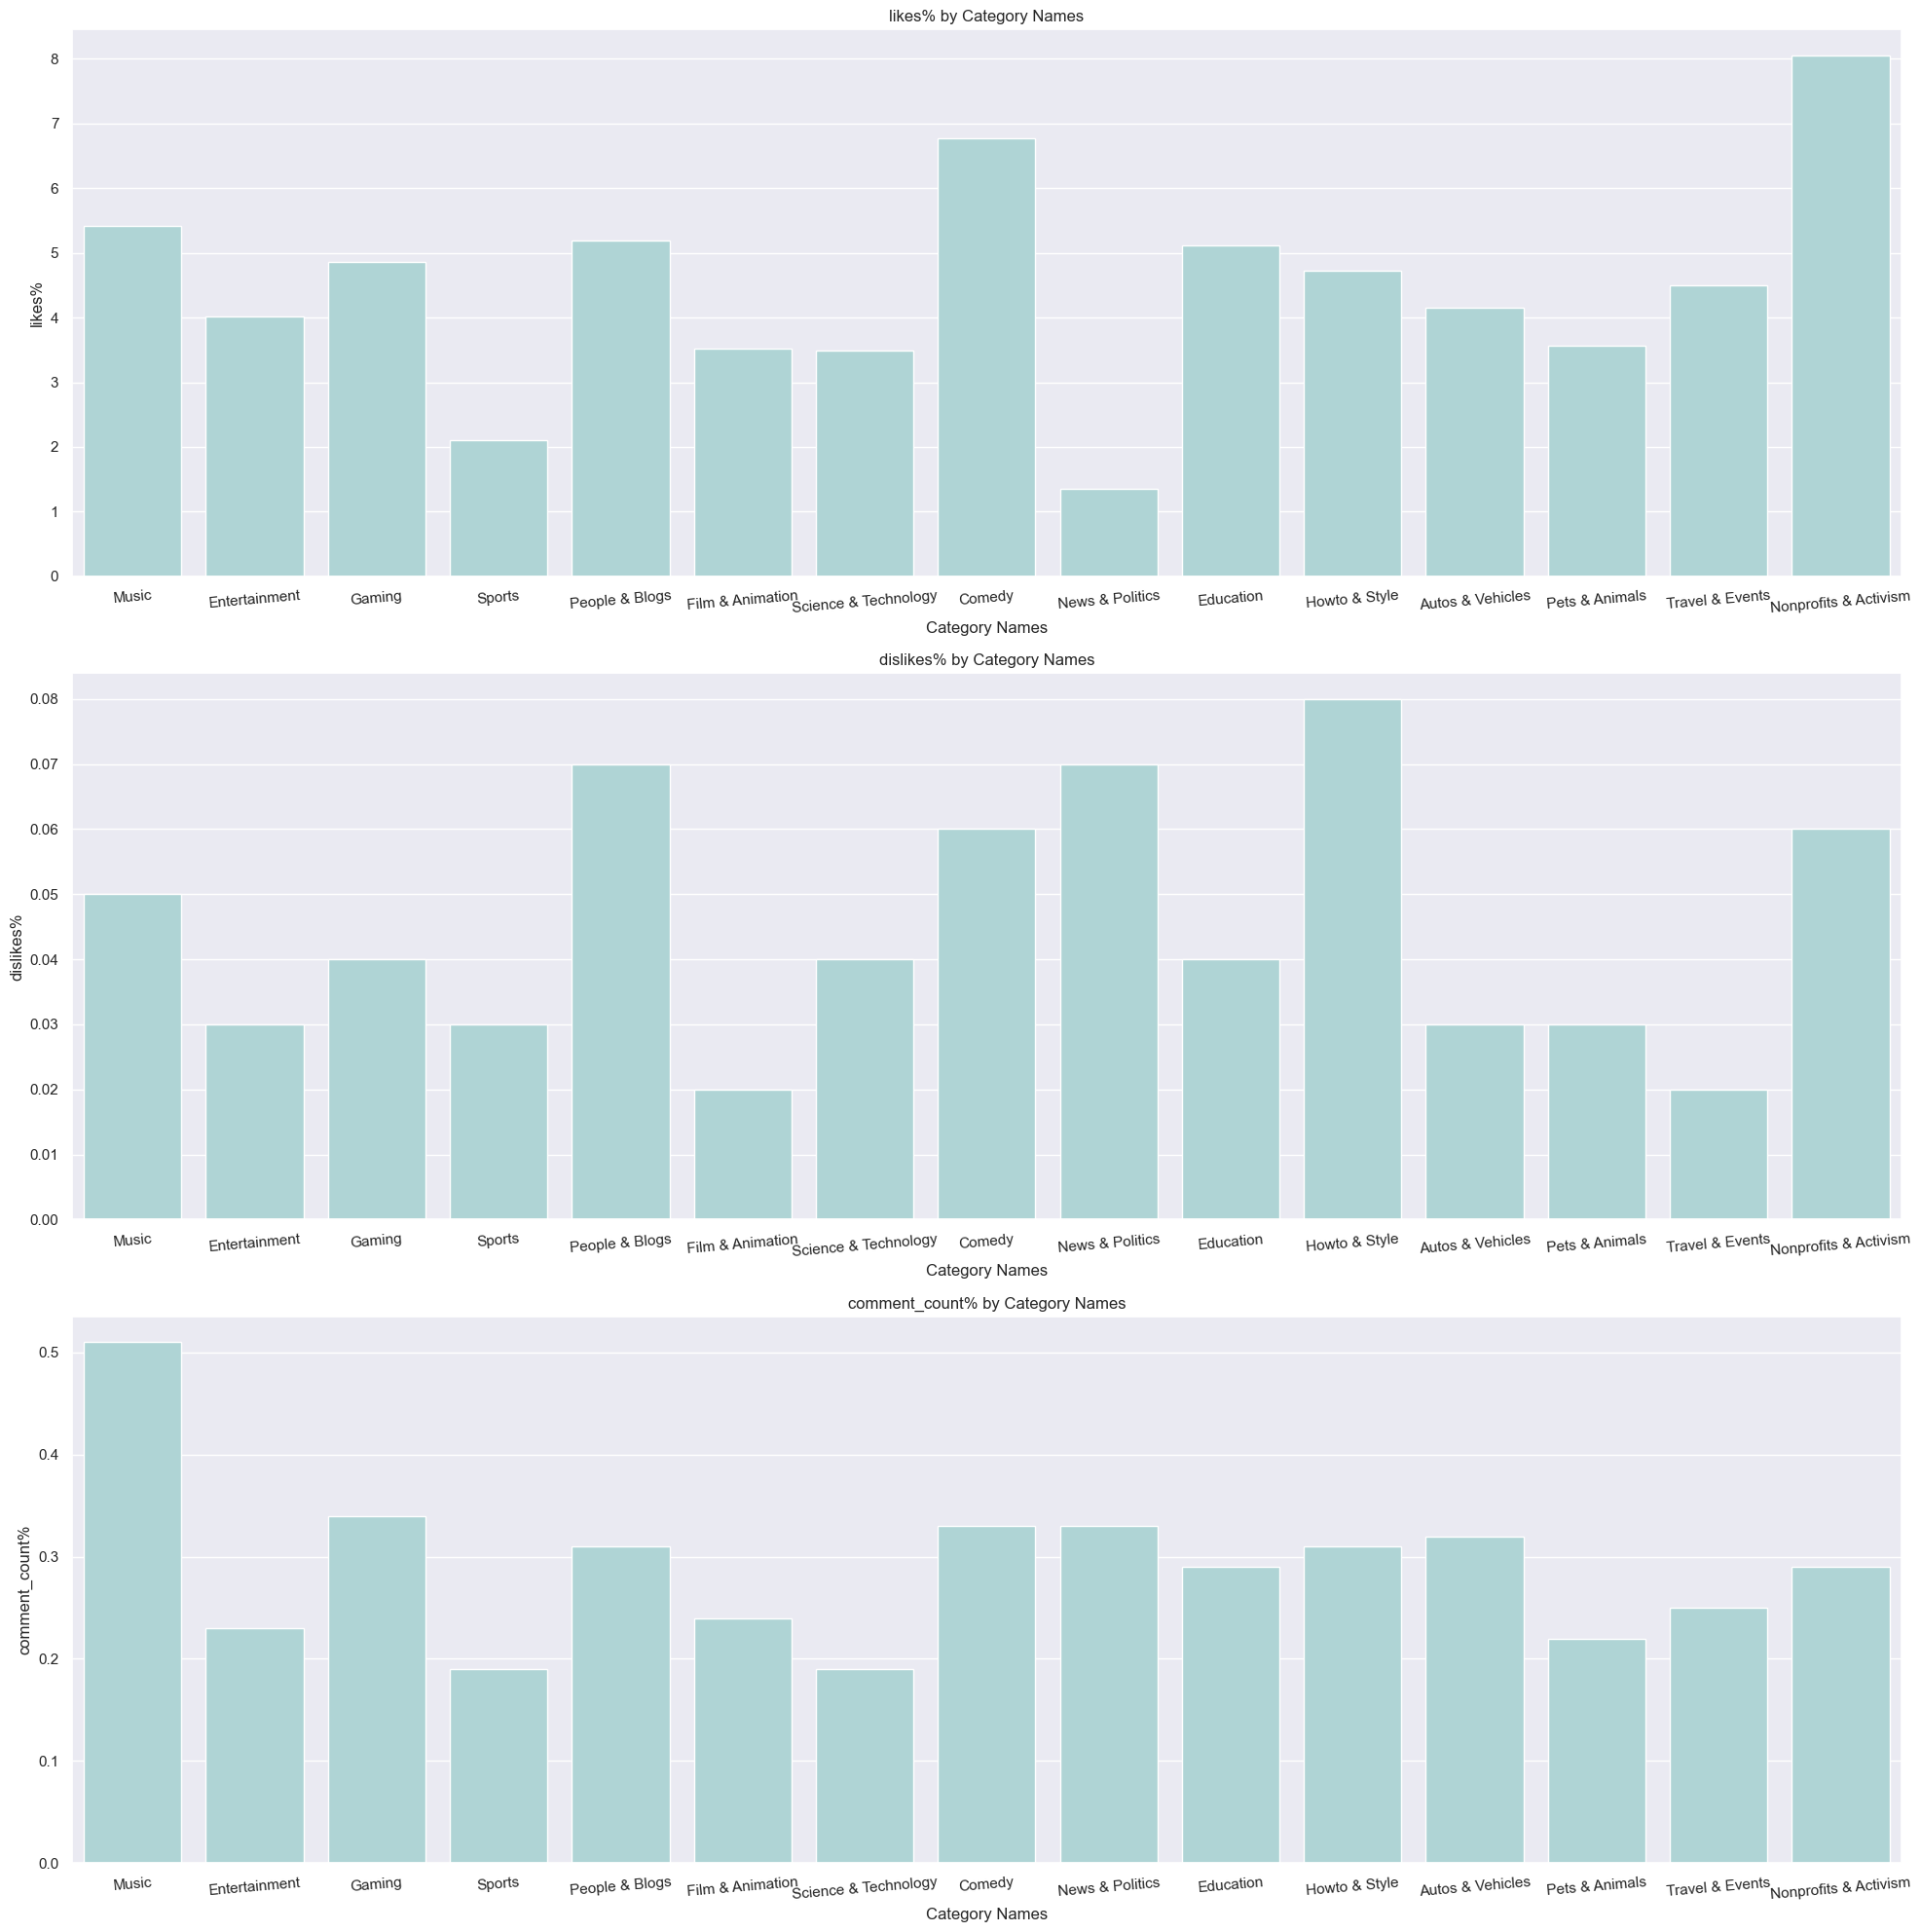

In [114]:
# create categories to show perfomance in term of  their likes%, dislikes%,comment_count% rates

plt.figure(figsize=(20, 20))
colum_list = ['likes%', 'dislikes%', 'comment_count%']

for i, col in enumerate(colum_list):
    plt.subplot(3, 1, i+1)
    
    sns.barplot(x='Category_names', y=col, data=df_category_analysis)
    plt.title(f'{col} by Category Names')
    plt.xlabel('Category Names')
    plt.ylabel(col)
    plt.xticks(rotation=5)

plt.tight_layout()
plt.show()


- Nonprofit & Activism has highest like rate audiences are highly engaged and supportive
- Howto $ style has the highest dislikes rate may be audiences expectation are  no met at the end of the videos
- Music has the higest like rate, a clear sign of strong popularity and audiences wide appeal


## Channel Analysis

In [115]:
# Overall view counts for by chanels 
df_channelTitle_analysis = df_max_views.groupby('channelTitle')['view_count'].sum().reset_index()

# Overall like counts for by chanels 
df_Likes = df_max_views.groupby('channelTitle')['likes'].sum().reset_index()

# Overall dislikes counts for by chanels 
df_dislikes = df_max_views.groupby('channelTitle')['dislikes'].sum().reset_index()

# Overall comment  counts for by chanels 
df_comment_count = df_max_views.groupby('channelTitle')['comment_count'].sum().reset_index()

#Add all in df_channelTitle_analysis
df_channelTitle_analysis['likes'] = df_Likes['likes']
df_channelTitle_analysis['dislikes'] = df_dislikes['dislikes']
df_channelTitle_analysis['comment_count'] = df_comment_count['comment_count']
df_channelTitle_analysis = df_channelTitle_analysis.sort_values(by='view_count',ascending=False).set_index('channelTitle')
df_channelTitle_analysis.head()

,view_count,likes,dislikes,comment_count
channelTitle,,,,
MrBeast,5359624083,254777337,928195,10823227
HYBE LABELS,2262774711,190208782,538641,28665215
BLACKPINK,1992343037,156460294,1929218,20614792
SMTOWN,1735182663,79736761,737410,13867272
JYP Entertainment,1645754478,78544755,609057,13057295


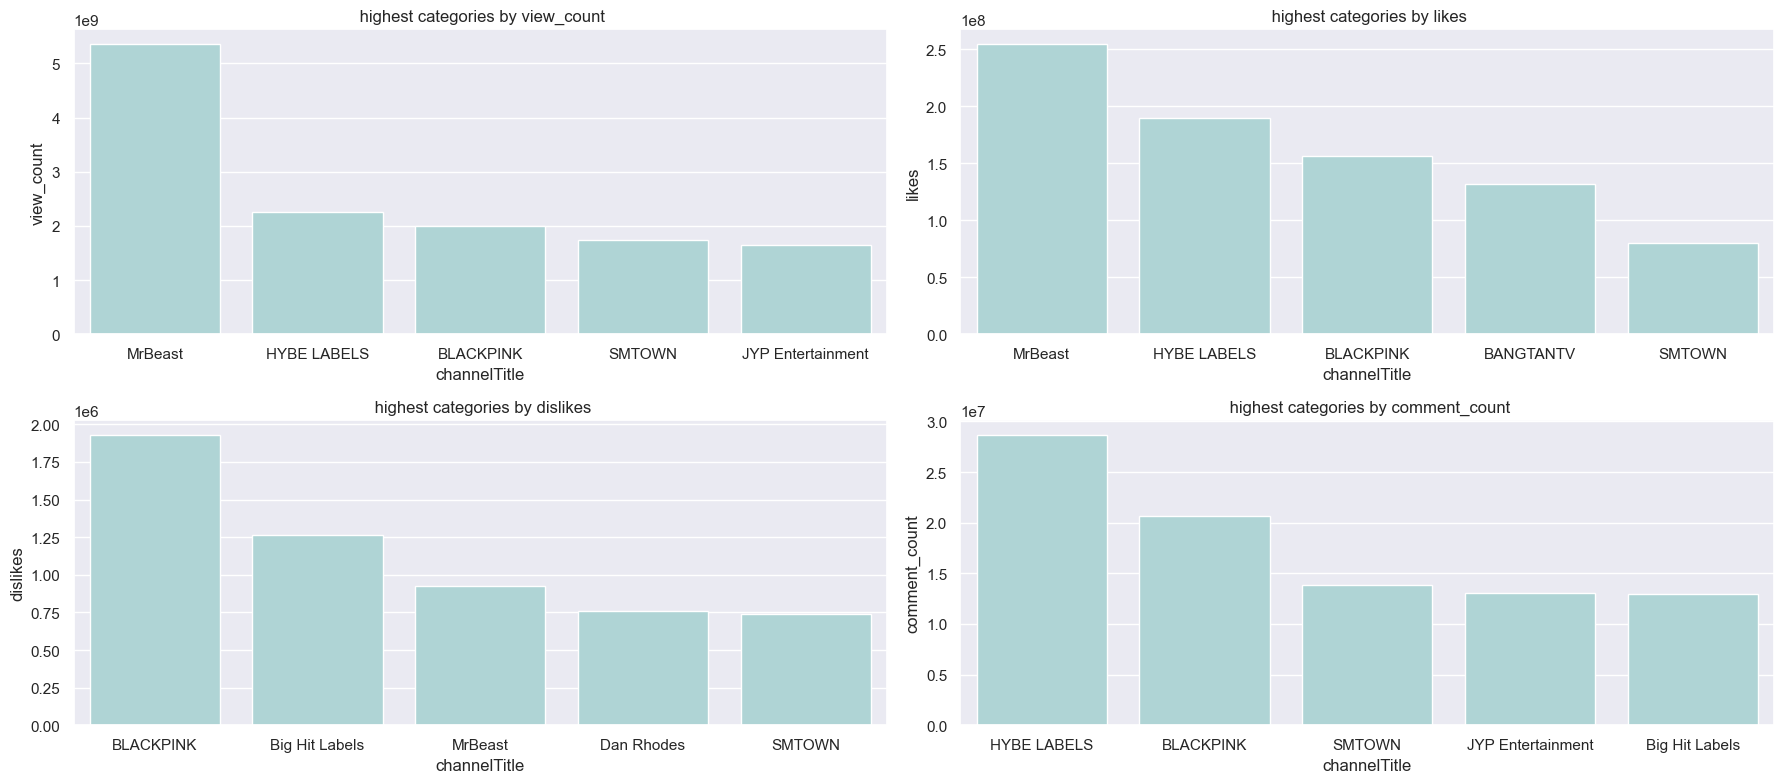

In [116]:
plt.figure(figsize=(18,8))
colum_list = ['view_count','likes','dislikes','comment_count']

for i, col in enumerate(colum_list, 1):
    plt.subplot(2, 2, i)
    top5 =df_channelTitle_analysis [col].nlargest(5) # there are 8513 channelTitle but we wiil be viewing the top5
    sns.barplot(x=top5.index, y=top5.values)
    plt.title(f' highest categories by {col}')
    plt.xlabel('channelTitle')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

-  Mr beast has the highest view counts and likes
-  Blact pink has highest dislikes and second higest comment probably due to audience dissatisfaction or controversy
-  Hybe labels has the higest comment


# Feature engineering for categories

In [117]:
# to view channel with most view count engagement_rate,likes rate ,dislikes rate,comment  rate 

df_channelTitle_analysis['engagement_rate'] = round((df_channelTitle_analysis['likes'] + df_channelTitle_analysis["dislikes"])/df_channelTitle_analysis["view_count"]*100,2)

df_channelTitle_analysis['likes%'] = round((df_channelTitle_analysis['likes']/df_channelTitle_analysis['view_count'])*100,2)

df_channelTitle_analysis['dislikes%'] = round((df_channelTitle_analysis['dislikes']/df_channelTitle_analysis['view_count'])*100,2)

df_channelTitle_analysis['comment_count%'] = round((df_channelTitle_analysis['comment_count']/df_channelTitle_analysis['view_count'])*100,2)

df_channelTitle_analysis= df_channelTitle_analysis
df_channelTitle_analysis.head()

,view_count,likes,dislikes,comment_count,engagement_rate,likes%,dislikes%,comment_count%
channelTitle,,,,,,,,
MrBeast,5359624083,254777337,928195,10823227,4.77,4.75,0.02,0.20
HYBE LABELS,2262774711,190208782,538641,28665215,8.43,8.41,0.02,1.27
BLACKPINK,1992343037,156460294,1929218,20614792,7.95,7.85,0.10,1.03
SMTOWN,1735182663,79736761,737410,13867272,4.64,4.60,0.04,0.80
JYP Entertainment,1645754478,78544755,609057,13057295,4.81,4.77,0.04,0.79


In [118]:
# remove channel with 0 view counts example Doritos has 0 view counts which will affect out visualization 
# it can be consider outlier
df_channelTitle_analysis = df_channelTitle_analysis[df_channelTitle_analysis['view_count'] > 0]


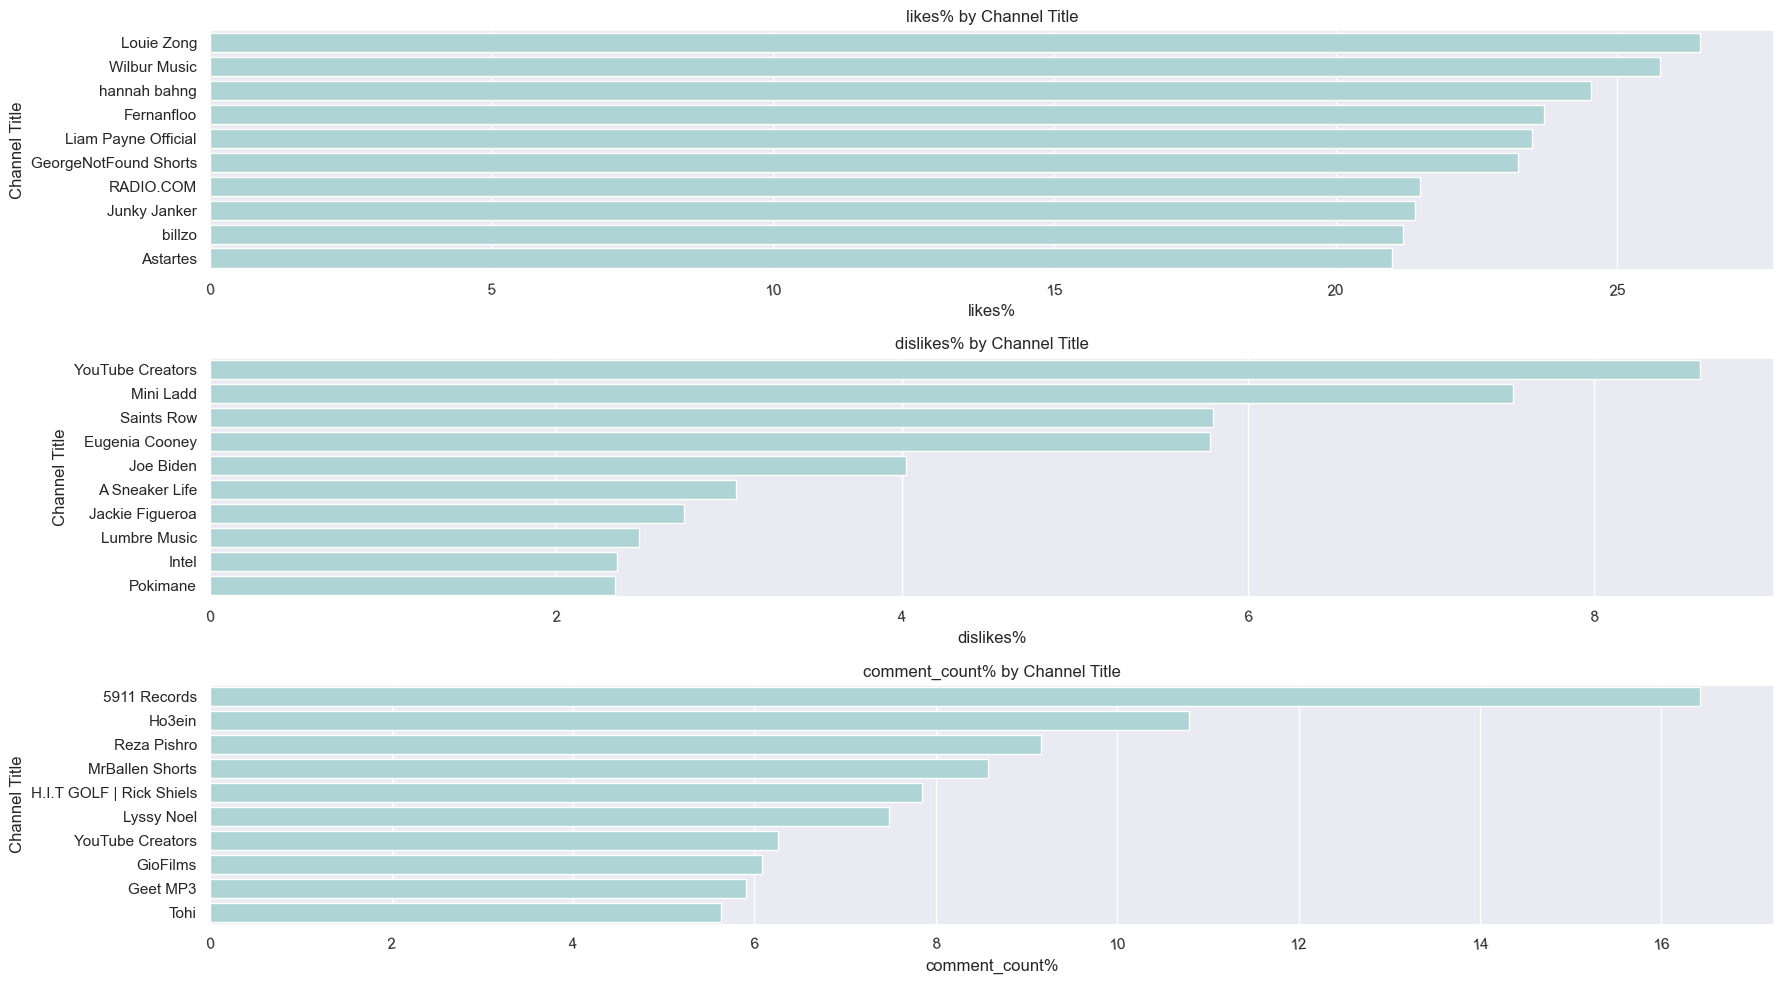

In [119]:
colum_list = ['likes%', 'dislikes%', 'comment_count%']
plt.figure(figsize=(18,10))

for i, col in enumerate(colum_list):
    plt.subplot(3, 1, i+1)
    top_channels = df_channelTitle_analysis.sort_values(by=col, ascending=False).head(10) # filtering fot top 10 channels by colum list
    
    sns.barplot(x=col, y='channelTitle', data=top_channels)
    plt.title(f'{col} by Channel Title')
    plt.xlabel(col)
    plt.ylabel('Channel Title')
    plt.xticks(rotation=5)

plt.tight_layout()
plt.show()


- ChannelTitle lourie zong has the higest like rate
- ChannelTitle  Youtube Creators has the higest dislike rate
- ChannelTitle 5911 records has the highest records

## Vidoes in trending

In [120]:
# check the number of times each video appeaar in trend
Times_in_trend = df_youtube.groupby('video_id')['view_count'].count().sort_values(ascending=False)
#Top videos that trend more than once
Times_in_trend

video_id
tnTPaLOaHz8    37
3ryID_SwU5E    37
QdBZY2fkU-0    36
tWYsfOSY9vY    36
9RhWXPcKBI8    36
               ..
TBGnF1MnUDU     1
TBFtJFwX3L0     1
TB9YMjCu0gU     1
1BC8F64ukSw     1
8pPj9i2ZoJ4     1
Name: view_count, Length: 47142, dtype: int64

In [121]:
def fetch_dataa(video_id):
    return  Times_in_trend[video_id]

In [122]:
# create a new column('Time_in_trend') for each video id
df_max_views.insert(13,'Time_in_trend',df_max_views['video_id'].apply(fetch_dataa))

In [123]:
Times_in_trend.index.nunique()

47142

In [124]:
# Top 10 cahnnels in trendy for longest
channelTitle_trend = df_max_views.groupby('channelTitle')['Time_in_trend'].sum().reset_index()

# most common category in total time in trend
channelTitle_trend['major_category'] = df_max_views.groupby('channelTitle')['Category_names'].agg(pd.Series.mode).reset_index()['Category_names']

channelTitle_trend = channelTitle_trend.sort_values("Time_in_trend",ascending=False).head(10)
channelTitle_trend

,channelTitle,Time_in_trend,major_category
4892,NFL,1793,Sports
4856,NBA,1489,Sports
4783,MrBeast,1127,Entertainment
4867,NBC Sports,802,Sports
1999,Dude Perfect,699,Sports
2056,ESPN,695,Sports
6936,The Game Theorists,674,Gaming
2412,First We Feast,639,Entertainment
6009,SSundee,629,Gaming
6008,SSSniperWolf,599,Entertainment


- NFL ,NBA and Mrbeast are the top 3 channel that stay in trend for the longest time 

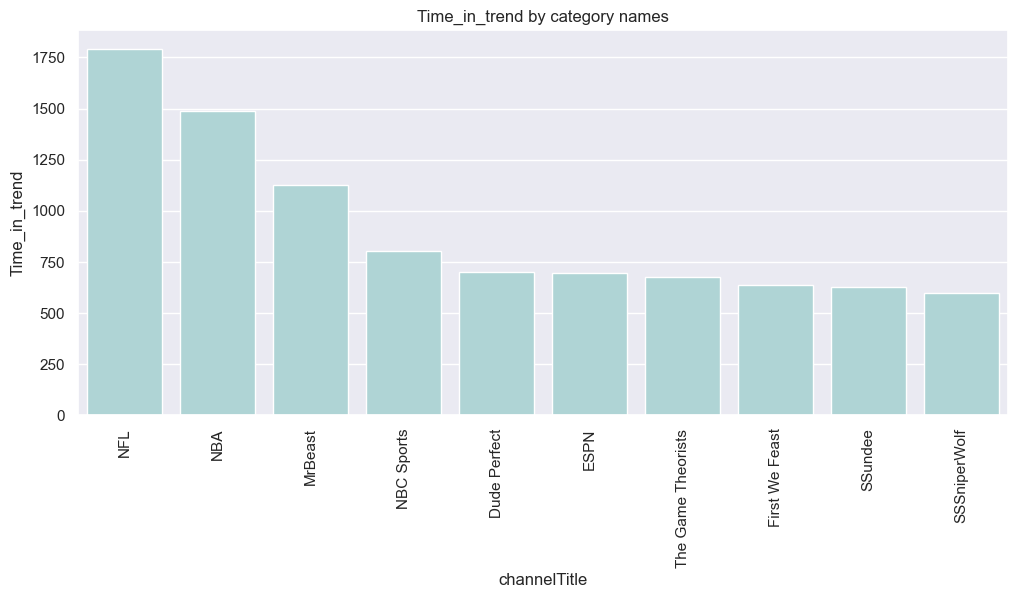

In [125]:
plt.figure(figsize=(12,5))
sns.barplot(x="channelTitle",y='Time_in_trend',data = channelTitle_trend)
plt.title('Time_in_trend by category names')
plt.xticks(rotation=90)
plt.show()

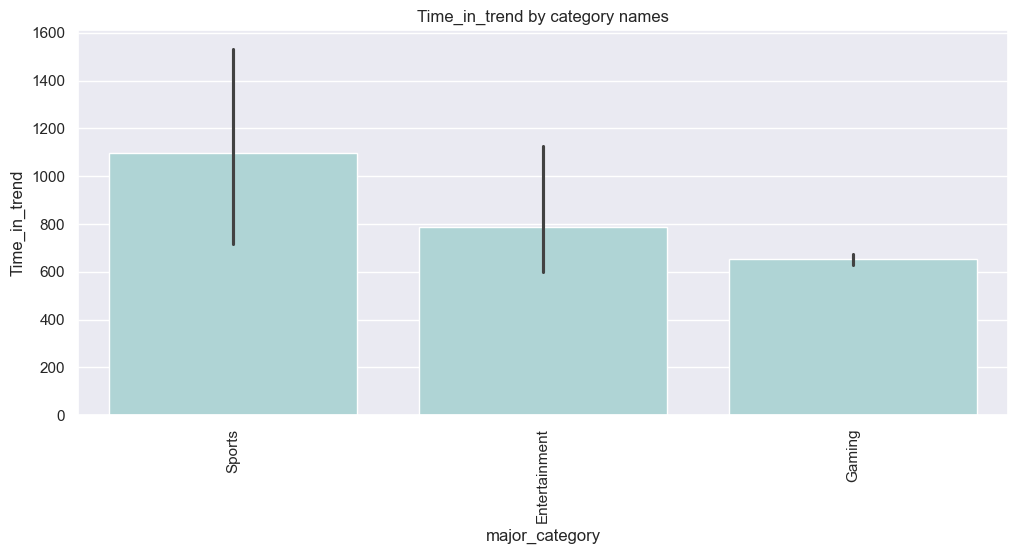

In [126]:
plt.figure(figsize=(12,5))
sns.barplot(x="major_category",y='Time_in_trend',data = channelTitle_trend)
plt.title('Time_in_trend by category names')
plt.xticks(rotation=90)
plt.show()

- sports is the most  category in trendy

In [127]:
df_max_views.publishedAt

266187   2024-04-01 17:46:17+00:00
152788   2022-08-19 04:00:13+00:00
56374    2021-05-21 03:46:13+00:00
3358     2020-08-21 03:58:10+00:00
73564    2021-07-03 04:04:57+00:00
                    ...           
48995    2021-04-17 14:56:38+00:00
268393   2024-03-15 20:27:26+00:00
74267    2021-08-10 15:04:25+00:00
73992    2021-08-10 15:08:22+00:00
15289    2020-10-25 01:40:31+00:00
Name: publishedAt, Length: 47142, dtype: datetime64[ns, UTC]

In [128]:
#get date in date format from publishedAt and trending_date columns
df_max_views['joined_date'] = pd.to_datetime(df_max_views.publishedAt).dt.date
df_max_views['trend_date'] = pd.to_datetime(df_max_views['trending_date']).dt.date
# no d days to reach trend 
df_max_views['days_to_trend'] =  df_max_views['trend_date'] - df_max_views['joined_date']
#drop days from -1
df_max_views['days_to_trend'] = df_max_views['days_to_trend'].apply(lambda x:0 if x == -1 else x)

In [129]:
df_max_views['days_to_trend'] = df_max_views['days_to_trend'].dt.days


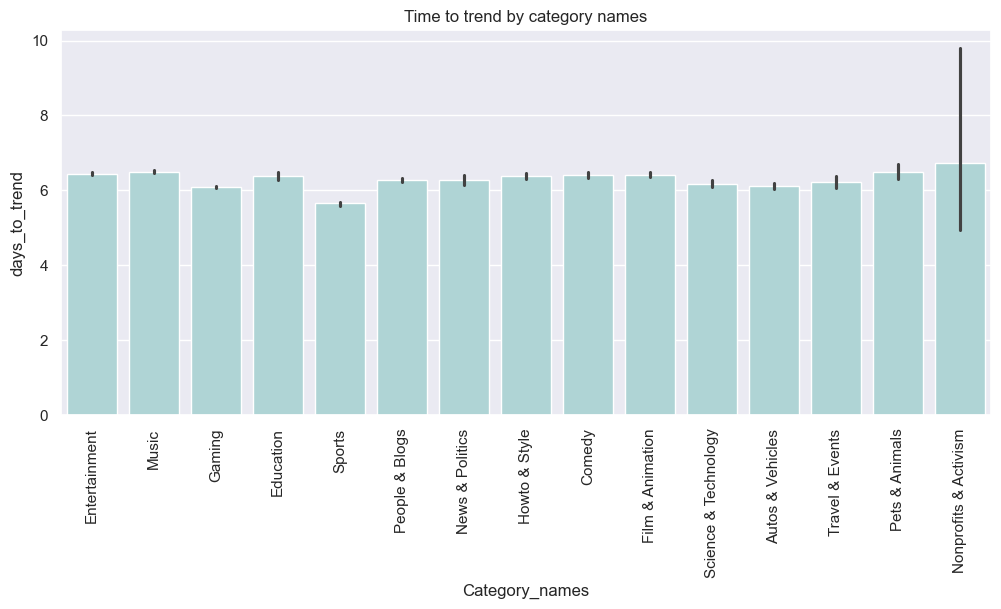

In [130]:
plt.figure(figsize=(12,5))
sns.barplot(x="Category_names",y='days_to_trend',data = df_max_views)
plt.title('Time to trend by category names')
plt.xticks(rotation=90)
plt.show()

- Nonprofits & Activism takes longer time to reach trend, gain attention slowly likely through steady organic growth
- sports reach trend in time compare to other categories,Likely due to real-time events, highlights, and time-sensitive content

In [131]:
df_max_views.corr(numeric_only=True)

,categoryId,view_count,likes,dislikes,comment_count,Time_in_trend,comments_disabled,ratings_disabled,days_to_trend
categoryId,1.000000,-0.043453,-0.071782,-0.024976,-0.052746,-0.007429,0.072618,0.000510,-0.003801
view_count,-0.043453,1.000000,0.627791,0.324585,0.402247,0.251732,0.000250,0.006475,0.235778
likes,-0.071782,0.627791,1.000000,0.466722,0.685398,0.249085,-0.022646,-0.026116,0.237645
dislikes,-0.024976,0.324585,0.466722,1.000000,0.466187,0.080832,0.008602,-0.011393,0.076578
comment_count,-0.052746,0.402247,0.685398,0.466187,1.000000,0.098500,-0.015415,-0.004084,0.086128
Time_in_trend,-0.007429,0.251732,0.249085,0.080832,0.098500,1.000000,-0.001185,-0.020537,0.847130
comments_disabled,0.072618,0.000250,-0.022646,0.008602,-0.015415,-0.001185,1.000000,0.212858,-0.004538
ratings_disabled,0.000510,0.006475,-0.026116,-0.011393,-0.004084,-0.020537,0.212858,1.000000,-0.032090
days_to_trend,-0.003801,0.235778,0.237645,0.076578,0.086128,0.847130,-0.004538,-0.032090,1.000000


In [132]:
df_max_views['comments_disabled'].value_counts()

comments_disabled
False    46518
True       624
Name: count, dtype: int64

In [133]:
disabled_coment = df_max_views[df_max_views['comments_disabled']==True]
disabled_coment['Category_names'].value_counts()

Category_names
News & Politics          165
Science & Technology     110
Entertainment            108
Gaming                    95
People & Blogs            71
Film & Animation          19
Music                     16
Sports                    13
Education                 10
Howto & Style              9
Comedy                     5
Autos & Vehicles           1
Travel & Events            1
Nonprofits & Activism      1
Name: count, dtype: int64

- There are 624 videos with disabled comment ,and news & politics have more videos with disabled comment which explain engament rate  is low, 
even though there view counts are high

In [134]:
# view the cchannelTitle with disabled comment
disabled_coment = df_max_views[df_max_views['comments_disabled']==True]
disabled_coment['channelTitle'].value_counts().head(10)

channelTitle
Apple                         57
NASA                          33
Bandai Namco Entertainment    27
Apple TV                      27
FINAL FANTASY XIV             19
Nintendo Mobile               19
The LaBrant Fam               17
9 News Australia              12
TODAY                         11
The Telegraph                 11
Name: count, dtype: int64

## Yearly Analysis

In [135]:
df_max_views['trending_date'] = pd.to_datetime(df_max_views['trending_date'])

In [136]:
# extract year of trending from date 
df_max_views['trending_year'] = df_max_views['trending_date'].dt.year

In [137]:
yearly_videos_count= df_max_views['trending_year'].value_counts().reset_index()
yearly_videos_count

,trending_year,count
0,2022,13932
1,2021,12958
2,2023,11994
3,2020,5063
4,2024,3195


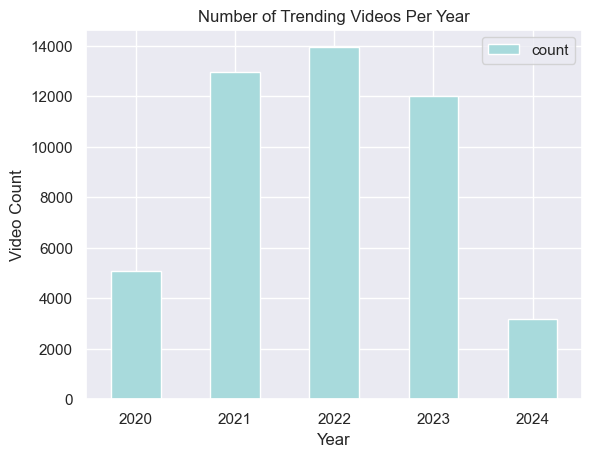

In [138]:
yearly_videos_count.sort_values(by='trending_year',ascending=True).plot(x='trending_year',y='count',kind='bar')
plt.title('Number of Trending Videos Per Year')
plt.xlabel('Year')
plt.ylabel('Video Count')
plt.xticks(rotation=0)
plt.show()


- 2022 has the highest number of videos in trending 

In [139]:
#Analyze the top categories over the year
# Step 1: Group by year and categor
yearly_trend_category = df_max_views.groupby(['trending_year', 'Category_names'])['view_count'].sum().reset_index()

# Step 2: Get the category with max views per year
top_category_per_year = yearly_trend_category.sort_values(['trending_year', 'view_count'], ascending=[True,False])
top_category_per_year = top_category_per_year.drop_duplicates('trending_year')
top_category_per_year.rename(columns={'view_count': 'category_max_view_counts'}, inplace=True)

top_category_per_year

,trending_year,Category_names,category_max_view_counts
7,2020,Music,5982525344
22,2021,Music,11199146983
37,2022,Music,8378886728
48,2023,Entertainment,9097295292
63,2024,Entertainment,4734211436


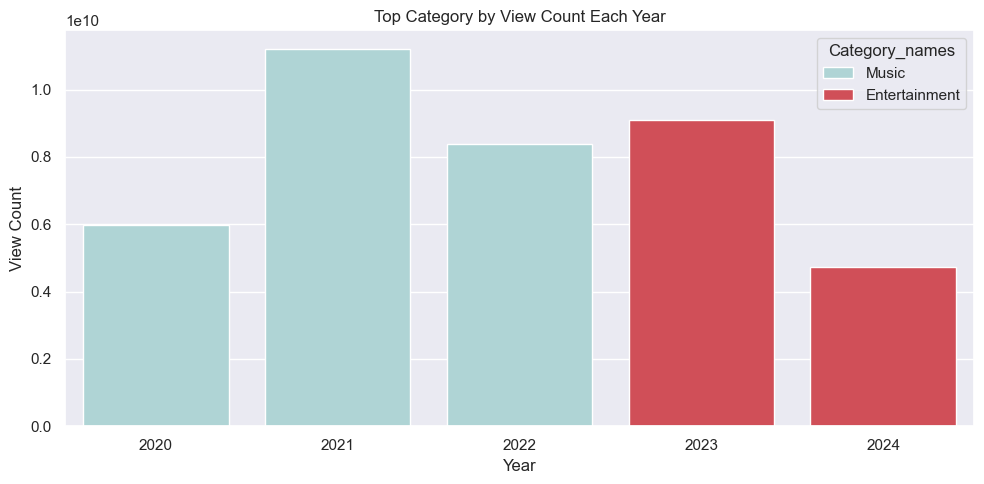

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=top_category_per_year, x='trending_year', y='category_max_view_counts', hue='Category_names')
plt.title("Top Category by View Count Each Year")
plt.ylabel("View Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


- The category with highest view count in 2020 - 2022 is music, the Higest view count of music categoey is  in year 2021
- The category with highest view count in 2023 - 2024 is Entertainment

In [141]:
#Analyze the top chanell over the year
# Step 1: Group by year and category
yearly_trend_channel= df_max_views.groupby(['trending_year', 'channelTitle'])['view_count'].sum().reset_index()

# Step 2: Get the category with max views per year
top_channel_per_year = yearly_trend_channel.sort_values(['trending_year', 'view_count'], ascending=[True,False])
top_chanel_per_year = top_channel_per_year.drop_duplicates('trending_year')
top_chanel_per_year.rename(columns={'view_count': 'channel_yearly_max_view_counts'}, inplace=True)

top_chanel_per_year

,trending_year,channelTitle,channel_yearly_max_view_counts
184,2020,Big Hit Labels,588829063
4345,2021,MrBeast,1018994738
6353,2022,BLACKPINK,645801717
12334,2023,MrBeast,2088683215
14212,2024,Discord,1407643634


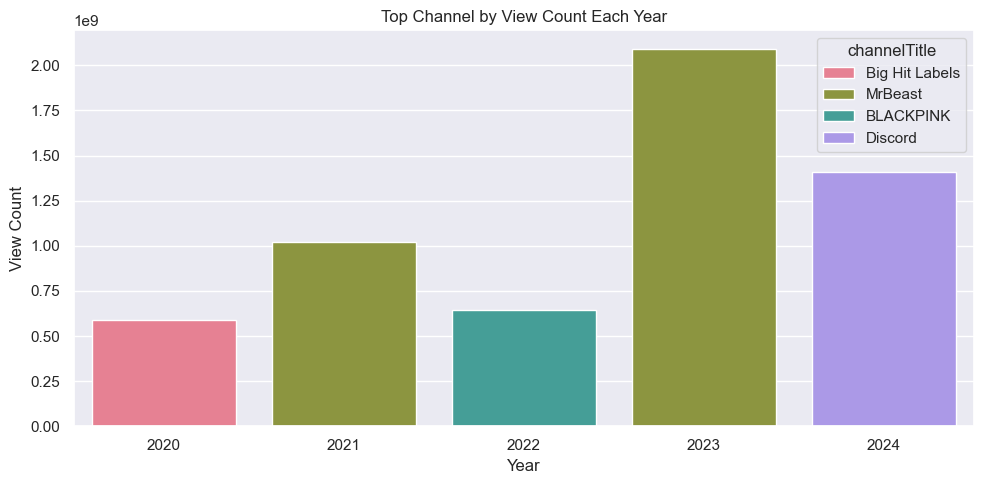

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=top_chanel_per_year, x='trending_year', y='channel_yearly_max_view_counts', hue='channelTitle')
plt.title("Top Channel by View Count Each Year")
plt.ylabel("View Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

- Mr beast is the top channel for year 2021 and 2023 where it reaches the peak over time ,mr beast has the highest view over time 
- discord is the top channel in year 2025
- big hit labels has the highest view in year 2020
- Blackpink has the highest view in year 2021


In [143]:

yearly_trend_views = df_max_views.groupby('trending_year')['view_count'].sum().reset_index()
yearly_trend_views.sort_values(by= ['view_count'] ,ascending=False)
yearly_trend_views.rename(columns={'view_count': 'overall_view_count'}, inplace=True)

yearly_trend_views

,trending_year,overall_view_count
0,2020,14913953562
1,2021,38985761592
2,2022,31032449928
3,2023,30658584300
4,2024,10256414178


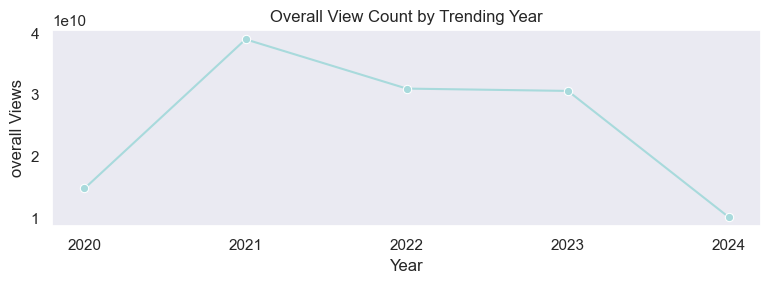

In [144]:
# visualize the year with highest view
plt.figure(figsize=(8,3))
sns.lineplot( x='trending_year', y='overall_view_count', marker='o',data=yearly_trend_views)
plt.title("Overall View Count by Trending Year")
plt.xticks(yearly_trend_views['trending_year'])
plt.xlabel("Year")
plt.ylabel("overall Views")
plt.grid(False)
plt.tight_layout()
plt.show()

- year with overall highest view is 2021,but 2022 has the higest no of videos in trend 
- year with overall highest view is 2024

In [145]:
# overall yearly perfomance 
df_yearly_views = yearly_trend_views.merge(
    top_category_per_year[['trending_year','category_max_view_counts','Category_names'	]],
    on = 'trending_year',
    how='inner'
)
df_yearly_views = df_yearly_views.merge(top_chanel_per_year[['trending_year', 'channel_yearly_max_view_counts','channelTitle']],
    on = 'trending_year',
    how='inner'
)
df_yearly_views

,trending_year,overall_view_count,category_max_view_counts,Category_names,channel_yearly_max_view_counts,channelTitle
0,2020,14913953562,5982525344,Music,588829063,Big Hit Labels
1,2021,38985761592,11199146983,Music,1018994738,MrBeast
2,2022,31032449928,8378886728,Music,645801717,BLACKPINK
3,2023,30658584300,9097295292,Entertainment,2088683215,MrBeast
4,2024,10256414178,4734211436,Entertainment,1407643634,Discord


In [146]:
yearly_videos_count .rename(columns={'count': 'overall_video_count'}, inplace=True)
yearly_videos_count = yearly_videos_count.sort_values(by = 'trending_year',ascending=True)
yearly_videos_count

,trending_year,overall_video_count
3,2020,5063
1,2021,12958
0,2022,13932
2,2023,11994
4,2024,3195


In [147]:
overall_yearly_perfomanc = yearly_videos_count.merge(
    df_yearly_views[['trending_year', 'overall_view_count', 'category_max_view_counts',
                     'Category_names', 'channel_yearly_max_view_counts', 'channelTitle']],
    on='trending_year',
    how='inner'
)
overall_yearly_perfomanc

,trending_year,overall_video_count,overall_view_count,category_max_view_counts,Category_names,channel_yearly_max_view_counts,channelTitle
0,2020,5063,14913953562,5982525344,Music,588829063,Big Hit Labels
1,2021,12958,38985761592,11199146983,Music,1018994738,MrBeast
2,2022,13932,31032449928,8378886728,Music,645801717,BLACKPINK
3,2023,11994,30658584300,9097295292,Entertainment,2088683215,MrBeast
4,2024,3195,10256414178,4734211436,Entertainment,1407643634,Discord


In [148]:
df_max_views.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'Category_names', 'trending_date', 'tags', 'view_count',
       'likes', 'dislikes', 'comment_count', 'Time_in_trend', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'description', 'joined_date',
       'trend_date', 'days_to_trend', 'trending_year'],
      dtype='object')

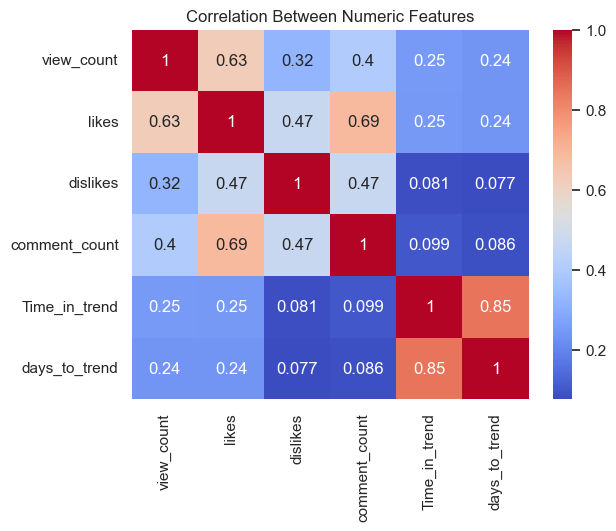

In [149]:
numeric_cols = ['view_count', 'likes', 'dislikes', 'comment_count', 'Time_in_trend', 'days_to_trend']
sns.heatmap(df_max_views[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


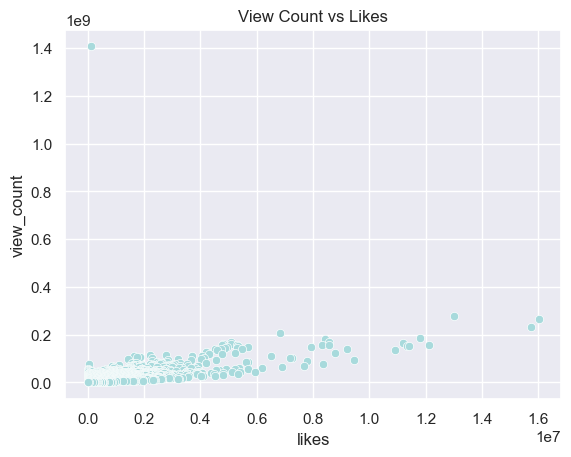

In [150]:
sns.scatterplot(data=df_max_views, x='likes', y='view_count')
plt.title("View Count vs Likes")
plt.show()


- There is a video with very large view count , which makes the distribution very small to view 
- It can be considered outlier for the purpose of this visualization

In [151]:
# filter out the video value with large view count 
view_outlier =df_max_views[df_max_views['view_count'] > 1e9]

# drop outlier
df_without_outlier = df_max_views.drop(view_outlier.index,axis=0)
view_outlier

,video_id,title,publishedAt,channelId,channelTitle,categoryId,Category_names,trending_date,tags,view_count,...,comment_count,Time_in_trend,thumbnail_link,comments_disabled,ratings_disabled,description,joined_date,trend_date,days_to_trend,trending_year
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,Entertainment,2024-04-03 00:00:00+00:00,[None],1407643634,...,13987,11,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...,2024-04-01,2024-04-03,2,2024


- The video_id with video_id , has 1407643634 view count which is massively high compare to other videos

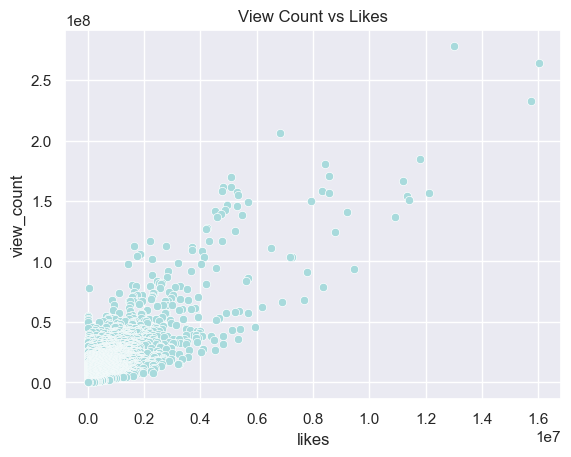

In [152]:
# view without outlier 
sns.scatterplot(data=df_without_outlier, x='likes', y='view_count')
plt.title("View Count vs Likes")
plt.show()


- Thers is a positive relationship between view counts and likes,as likes increase, view counts also tend to increase
- There is a video with very high view count compare to others ,it can be consider as outlier



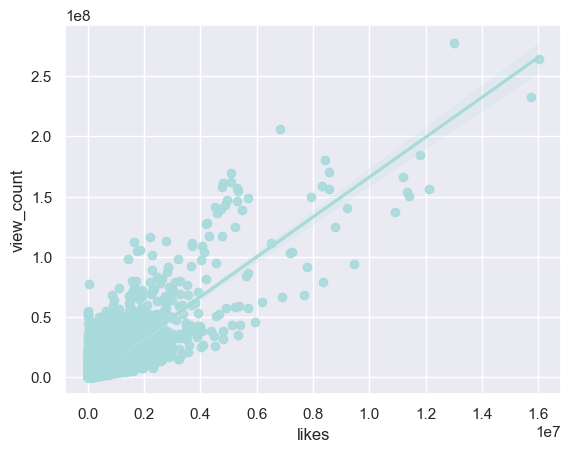

In [153]:
sns.regplot(data=df_without_outlier, x='likes', y='view_count', scatter_kws={'alpha':0.9})
plt.show()

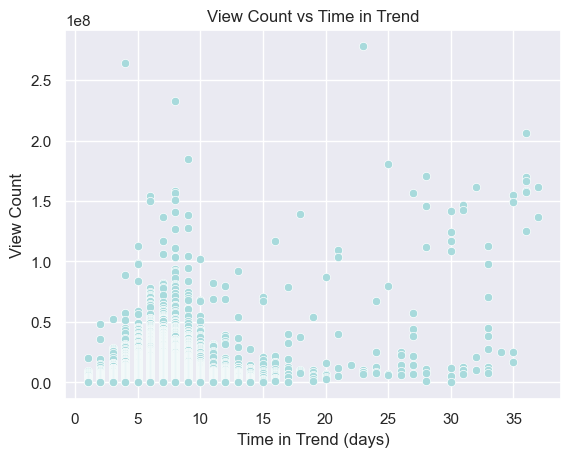

In [154]:
sns.scatterplot(data=df_without_outlier, x='Time_in_trend', y='view_count')
plt.title("View Count vs Time in Trend")
plt.xlabel("Time in Trend (days)")
plt.ylabel("View Count")
plt.show()

- There is no correlation between view count and time in trends,many  videos that spend less than 10 days trend faster with high views
- Videos that stayed over 20 days often have lower view counts, only fews has high views 
- This  suggests staying long on the trend doesn’t always guarantee virality,being trendy longer doesn’t ensure more views.



# Observation 

### Trending Frequency
Most videos appeared on the trending list multiple times.

### Top Categories by Popularity

Gaming is the most common category

Followed by Entertainment and Music

### Top Categories by Interaction

Music leads in total views, followed by Entertainment and Gaming

Nonprofits & Activism is the least common but shows high engagement despite low interaction volume

### Engagement Rate Observations

News & Politics and Sports have low engagement rates despite high views

Shows that high views ≠ strong audience connection

### Top Channels by Metrics

MrBeast: highest views and likes

BLACKPINK: highest dislikes and second-highest comments (likely due to controversy)

Hybe Labels: highest comments

Lourie Zong: highest like rate

YouTube Creators: highest dislike rate

5911 Records: leads in total uploads

NFL, NBA, and MrBeast: stay trending the longest

### Trend Timing by Category

Nonprofits & Activism takes longer to trend — likely grows via organic attention

Sports trend quickly — likely driven by real-time relevance

### Yearly Highlights

2022: most trending videos

2021: highest overall views

2020–2022: Music dominates in views, peaking in 2021

2023–2024: Entertainment leads in total views

### Channel Highlights by Year

MrBeast: top performer in 2021 and 2023

Discord: highest views in 2025

Big Hit Labels: highest views in 2020

BLACKPINK: topped 2021

### Engagement Patterns

Strong positive correlation between likes and view count

A specific video (cc2-4ci4G84very) had extremely high views — flagged as an outlier

### Trend Duration vs Views

No strong correlation between time spent in trend and view count

Many high-performing videos trended for less than 10 days



### Recomendation

- build a linear regression model to know  to understand what drives video popularity.

